## TRABAJO MINERÍA DE DATOS 01 - NAIN ACERO

In [171]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def downloadFromURL(url, filename, sep = ",", delim = "\n", encoding="utf-8", 
                   mainpath = "datasets"):
    #primero importamos la librería y hacemos la conexión con la web de los datos
    import urllib3
    http = urllib3.PoolManager()
    r = http.request('GET', url)
    print("El estado de la respuesta es %d" %(r.status))
    response = r.data ## CORREGIDO: eliminado un doble decode que daba error
    
    #El objeto reponse contiene un string binario, así que lo convertimos a un string descodificándolo en UTF-8
    str_data = response.decode(encoding)

    #Dividimos el string en un array de filas, separándolo por intros
    lines = str_data.split(delim)

    #La primera línea contiene la cabecera, así que la extraemos
    col_names = lines[0].split(sep)
    n_cols = len(col_names)

    #Generamos un diccionario vacío donde irá la información procesada desde la URL externa
    counter = 0
    main_dict = {}
    for col in col_names:
        main_dict[col] = []

    #Procesamos fila a fila la información para ir rellenando el diccionario con los datos como hicimos antes
    for line in lines:
        #Nos saltamos la primera línea que es la que contiene la cabecera y ya tenemos procesada
        if(counter > 0):
            #Dividimos cada string por las comas como elemento separador
            values = line.strip().split(sep)
            #Añadimos cada valor a su respectiva columna del diccionario
            for i in range(len(col_names)):
                main_dict[col_names[i]].append(values[i])
        counter += 1

    print("El data set tiene %d filas y %d columnas"%(counter, n_cols))

    #Convertimos el diccionario procesado a Data Frame y comprobamos que los datos son correctos
    df = pd.DataFrame(main_dict)
    print(df.head())

    #Elegimos donde guardarlo (en la carpeta athletes es donde tiene más sentido por el contexto del análisis)
    fullpath = os.path.join(mainpath, filename)

    #Lo guardamos en CSV, en JSON o en Excel según queramos
    df.to_csv(fullpath+".csv")
    df.to_json(fullpath+".json")
    df.to_excel(fullpath+".xls")
    print("Los ficheros se han guardado correctamente en: "+fullpath)
    
    return df

In [57]:
medals_url = "http://winterolympicsmedals.com/medals.csv"

In [58]:
medals_data = pd.read_csv(medals_url)

In [59]:
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [60]:
medals_df = downloadFromURL(medals_url, "downloaded_medals")
medals_df.head()

El estado de la respuesta es 200
El data set tiene 2312 filas y 8 columnas
   Year      City       Sport      Discipline  NOC       Event Event gender  \
0  1924  Chamonix     Skating  Figure skating  AUT  individual            M   
1  1924  Chamonix     Skating  Figure skating  AUT  individual            W   
2  1924  Chamonix     Skating  Figure skating  AUT       pairs            X   
3  1924  Chamonix   Bobsleigh       Bobsleigh  BEL    four-man            M   
4  1924  Chamonix  Ice Hockey      Ice Hockey  CAN  ice hockey            M   

    Medal  
0  Silver  
1    Gold  
2    Gold  
3  Bronze  
4    Gold  
Los ficheros se han guardado correctamente en: datasets\downloaded_medals


,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [62]:
mainpath = "datasets"
filename = "downloaded_medals.csv"
fullpath = os.path.join(mainpath, filename)

In [63]:
data = pd.read_csv(fullpath)

In [67]:
data.head(10)

,Unnamed: 0,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


In [68]:
data.tail(8)

,Unnamed: 0,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
2303,2303,2006,Turin,Skiing,Freestyle Ski.,USA,moguls,M,Bronze
2304,2304,2006,Turin,Skiing,Snowboard,USA,Giant parallel slalom,W,Bronze
2305,2305,2006,Turin,Skiing,Snowboard,USA,Half-pipe,M,Gold
2306,2306,2006,Turin,Skiing,Snowboard,USA,Half-pipe,M,Silver
2307,2307,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Gold
2308,2308,2006,Turin,Skiing,Snowboard,USA,Half-pipe,W,Silver
2309,2309,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,M,Gold
2310,2310,2006,Turin,Skiing,Snowboard,USA,Snowboard Cross,W,Silver


In [139]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [140]:
n = 500

gender_data = []
income_data = []

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [141]:
gender_data[1:10]

['Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female']

In [142]:
income_data[1:10]

['Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich',
 'Poor',
 'Poor',
 'Poor',
 'Poor']

In [143]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [144]:
data2 = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [145]:
data2.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,213.815135,37.419453,33.415938,19313.495003
1,Female,Middle Class,210.415726,46.337149,40.459340,20066.127618
2,Female,Middle Class,212.983444,80.460872,13.759463,19299.887745
3,Female,Rich,170.238301,55.494119,15.992265,19236.486920
4,Male,Rich,122.536513,82.784616,32.350811,19008.847782


## Agrupación de datos - ESIS

In [148]:
grouped_gender = data2.groupby("Gender")

In [149]:
grouped_gender.groups

{'Female': [0, 1, 2, 3, 8, 9, 10, 11, 12, 14, 16, 17, 18, 20, 21, 22, 23, 24, 29, 32, 38, 40, 42, 44, 45, 49, 51, 53, 58, 61, 62, 63, 64, 65, 66, 67, 68, 70, 79, 81, 82, 84, 88, 93, 95, 99, 100, 102, 105, 106, 112, 114, 118, 119, 121, 122, 123, 124, 128, 130, 132, 134, 135, 138, 139, 141, 148, 152, 153, 154, 155, 157, 158, 160, 164, 165, 166, 171, 173, 175, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 201, ...], 'Male': [4, 5, 6, 7, 13, 15, 19, 25, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 39, 41, 43, 46, 47, 48, 50, 52, 54, 55, 56, 57, 59, 60, 69, 71, 72, 73, 74, 75, 76, 77, 78, 80, 83, 85, 86, 87, 89, 90, 91, 92, 94, 96, 97, 98, 101, 103, 104, 107, 108, 109, 110, 111, 113, 115, 116, 117, 120, 125, 126, 127, 129, 131, 133, 136, 137, 140, 142, 143, 144, 145, 146, 147, 149, 150, 151, 156, 159, 161, 162, 163, 167, 168, 169, 170, 172, 174, 176, 183, 189, 191, ...]}

In [150]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
0    Female            Rich  213.815135  37.419453  33.415938  19313.495003
1    Female    Middle Class  210.415726  46.337149  40.459340  20066.127618
2    Female    Middle Class  212.983444  80.460872  13.759463  19299.887745
3    Female            Rich  170.238301  55.494119  15.992265  19236.486920
8    Female            Poor  139.763573  74.300924  35.673124  19152.070055
..      ...             ...         ...        ...        ...           ...
493  Female    Middle Class  199.267558  68.990889  65.097098  18348.665244
495  Female            Poor  152.560839  49.430127  30.830144  18377.040790
496  Female            Rich  133.911877  47.570996  25.326268  21023.978136
497  Female            Poor  125.629018  35.422322   8.574834  18170.225508
498  Female            Rich  161.182766  51.666280  29.043592  21112.805709

[248 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [151]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,213.815135,37.419453,33.415938,19313.495003
1,Female,Middle Class,210.415726,46.337149,40.459340,20066.127618
2,Female,Middle Class,212.983444,80.460872,13.759463,19299.887745
3,Female,Rich,170.238301,55.494119,15.992265,19236.486920
8,Female,Poor,139.763573,74.300924,35.673124,19152.070055
...,...,...,...,...,...,...
493,Female,Middle Class,199.267558,68.990889,65.097098,18348.665244
495,Female,Poor,152.560839,49.430127,30.830144,18377.040790
496,Female,Rich,133.911877,47.570996,25.326268,21023.978136
497,Female,Poor,125.629018,35.422322,8.574834,18170.225508


In [153]:
double_group = data2.groupby(["Gender", "Economic Status"])

In [154]:
len(double_group)

6

In [155]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  210.415726  46.337149  40.459340  20066.127618
2    Female    Middle Class  212.983444  80.460872  13.759463  19299.887745
11   Female    Middle Class  184.999759  69.572785  38.220297  18575.612153
14   Female    Middle Class  172.024987  63.176767  21.231760  19745.529758
23   Female    Middle Class  204.003342  96.271658  40.930672  18736.339021
..      ...             ...         ...        ...        ...           ...
484  Female    Middle Class   93.366090  64.064257  29.733810  19051.500547
488  Female    Middle Class  162.184542  68.027888  48.165209  19738.609336
489  Female    Middle Class  177.584087  37.715024  34.498560  21164.059577
490  Female    Middle Class  134.696923  96.230289  36.599422  21036.466343
493  Female    Middle Class  199.267558  68.990889  65.097098  18348.665244

[81 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados - ESIS

In [156]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     13126.800189  5511.972971  2527.569591  1.603646e+06
       Poor             13154.324697  5421.978243  2534.258062  1.643682e+06
       Rich             13492.598063  5286.213962  2684.804167  1.638257e+06
Male   Middle Class     14986.215330  6197.629464  2724.567851  1.856541e+06
       Poor             12239.445730  5125.358674  2209.389804  1.495774e+06
       Rich             12714.224521  5663.823030  2469.328481  1.611256e+06

In [157]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     162.059262  68.049049  31.204563  19798.093909
       Poor             156.599104  64.547360  30.169739  19567.648459
       Rich             162.561422  63.689325  32.347038  19738.041876
Male   Middle Class     159.427823  65.932228  28.984764  19750.435686
       Poor             161.045339  67.438930  29.070918  19681.237179
       Rich             155.051519  69.071013  30.113762  19649.462342

In [158]:
double_group.size()

Gender  Economic Status
Female  Middle Class       81
        Poor               84
        Rich               83
Male    Middle Class       94
        Poor               76
        Rich               82
dtype: int64

In [159]:
double_group.describe()

Height                                                \
                        count        mean        std        min         25%   
Gender Economic Status                                                        
Female Middle Class      81.0  162.059262  35.135859  87.169669  135.094818   
       Poor              84.0  156.599104  29.954818  85.478907  132.433129   
       Rich              83.0  162.561422  33.567618  59.807179  145.134290   
Male   Middle Class      94.0  159.427823  29.367256  92.072417  141.261643   
       Poor              76.0  161.045339  32.537641  69.982292  140.908053   
       Rich              82.0  155.051519  29.976729  91.834370  133.701393   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     163.279580  182.996098  270.069558   81.0  68.049049   
       Poor             156.061726  180.785643  215.024708   84.0  64.547360   
       Rich             167.714001  187.609981  239.728710   83.0  63.689325   
Male   Middle Class     158.937081  175.307614  224.343296   94.0  65.932228   
       Poor             163.330994  182.298962  242.343240   76.0  67.438930   
       Rich             154.618505  171.876047  241.861172   82.0  69.071013   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.220297  65.097098   81.0  19798.093909   
       Poor             ...  37.865555  55.665872   84.0  19567.648459   
       Rich             ...  39.822242  71.818129   83.0  19738.041876   
Male   Middle Class     ...  35.827631  52.305413   94.0  19750.435686   
       Poor             ...  38.258913  56.498346   76.0  19681.237179   
       Rich             ...  34.077691  63.707694   82.0  19649.462342   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1069.491966  18006.411132  18745.944704  19906.681305   
       Poor             1061.688963  18018.604091  18490.810586  19553.441833   
       Rich              935.775141  18057.492768  19074.330158  19543.057040   
Male   Middle Class     1010.971536  18008.292777  18898.801947  19684.621297   
       Poor             1020.497713  18001.086045  18895.530318  19684.952415   
       Rich              971.882798  18018.313630  18854.876143  19666.382007   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20667.438912  21490.568604  
       Poor             20585.313151  21498.700565  
       Rich             20467.442384  21499.910003  
Male   Middle Class     20662.253161  21461.772091  
       Poor             20605.333767  21451.735077  
       Rich             20506.256545  21320.868285  

[6 rows x 32 columns]

In [160]:
grouped_income = double_group["Income"]

In [161]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      81.0  19798.093909  1069.491966  18006.411132   
       Poor              84.0  19567.648459  1061.688963  18018.604091   
       Rich              83.0  19738.041876   935.775141  18057.492768   
Male   Middle Class      94.0  19750.435686  1010.971536  18008.292777   
       Poor              76.0  19681.237179  1020.497713  18001.086045   
       Rich              82.0  19649.462342   971.882798  18018.313630   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18745.944704  19906.681305  20667.438912  21490.568604  
       Poor             18490.810586  19553.441833  20585.313151  21498.700565  
       Rich             19074.330158  19543.057040  20467.442384  21499.910003  
Male   Middle Class     18898.801947  19684.621297  20662.253161  21461.772091  
       Poor             18895.530318  19684.952415  20605.333767  21451.735077  
       Rich             18854.876143  19666.382007  20506.256545  21320.868285

In [162]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.603646e+06  31.204563  35.135859
       Poor             1.643682e+06  30.169739  29.954818
       Rich             1.638257e+06  32.347038  33.567618
Male   Middle Class     1.856541e+06  28.984764  29.367256
       Poor             1.495774e+06  29.070918  32.537641
       Rich             1.611256e+06  30.113762  29.976729

In [163]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     31.204563  4.641099
       Poor             30.169739  5.259242
       Rich             32.347038  4.872245
Male   Middle Class     28.984764  5.457870
       Poor             29.070918  4.982396
       Rich             30.113762  5.204227

In [164]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13126.800189  162.059262  35.135859  5511.972971   
       Poor             13154.324697  156.599104  29.954818  5421.978243   
       Rich             13492.598063  162.561422  33.567618  5286.213962   
Male   Middle Class     14986.215330  159.427823  29.367256  6197.629464   
       Poor             12239.445730  161.045339  32.537641  5125.358674   
       Rich             12714.224521  155.051519  29.976729  5663.823030   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     68.049049  25.088228  2527.569591  31.204563   
       Poor             64.547360  23.981559  2534.258062  30.169739   
       Rich             63.689325  28.802959  2684.804167  32.347038   
Male   Middle Class     65.932228  26.121629  2724.567851  28.984764   
       Poor             67.438930  24.595440  2209.389804  29.070918   
       Rich             69.071013  26.477143  2469.328481  30.113762   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.103690  1.603646e+06  19798.093909  1069.491966  
       Poor             12.943040  1.643682e+06  19567.648459  1061.688963  
       Rich             11.985520  1.638257e+06  19738.041876   935.775141  
Male   Middle Class     10.567212  1.856541e+06  19750.435686  1010.971536  
       Poor             12.722099  1.495774e+06  19681.237179  1020.497713  
       Rich             11.626315  1.611256e+06  19649.462342   971.882798

In [165]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     4.641099  2.729289  2.594166  18.627019
       Poor             5.259242  2.707707  2.344962  18.541375
       Rich             4.872245  2.224650  2.715250  21.220943
Male   Middle Class     5.457870  2.537581  2.757603  19.640847
       Poor             4.982396  2.760147  2.300256  19.414067
       Rich             5.204227  2.624757  2.606078  20.342353

## Filtrado de datos - ESIS

In [166]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      33.415938
1      40.459340
2      13.759463
3      15.992265
4      32.350811
         ...    
495    30.830144
496    25.326268
497     8.574834
498    29.043592
499    32.273090
Name: Age, Length: 424, dtype: float64

## Transformación de variables - ESIS

In [167]:
zscore = lambda x : (x - x.mean())/x.std()

In [168]:
z_group = double_group.transform(zscore)

(array([  2.,  11.,  36.,  80., 112., 142.,  73.,  31.,   9.,   4.]),
 array([-3.29285798e+00, -2.63424904e+00, -1.97564010e+00, -1.31703116e+00,
        -6.58422225e-01,  1.86712417e-04,  6.58795650e-01,  1.31740459e+00,
         1.97601353e+00,  2.63462246e+00,  3.29323140e+00]),
 <BarContainer object of 10 artists>)

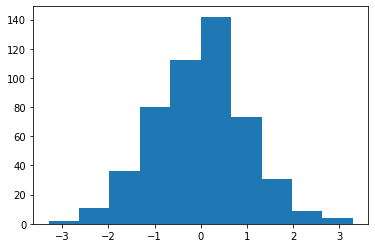

In [172]:
plt.hist(z_group["Age"])

In [173]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [174]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,213.815135,37.419453,33.415938,19313.495003
1,210.415726,46.337149,40.459340,20066.127618
2,212.983444,80.460872,13.759463,19299.887745
3,170.238301,55.494119,15.992265,19236.486920
4,122.536513,82.784616,32.350811,19008.847782
...,...,...,...,...
495,152.560839,49.430127,30.830144,18377.040790
496,133.911877,47.570996,25.326268,21023.978136
497,125.629018,35.422322,8.574834,18170.225508
498,161.182766,51.666280,29.043592,21112.805709


In [177]:
ricos = data2[ data2['Income']>20000.00000 ]
ricos

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,210.415726,46.337149,40.459340,20066.127618
5,Male,Rich,139.729004,83.172614,53.615145,20006.499533
19,Male,Middle Class,140.718637,90.016701,23.290719,20286.381847
22,Female,Rich,145.401685,73.420101,51.746989,21003.885726
31,Male,Rich,153.485748,77.070607,41.217413,20353.148365
...,...,...,...,...,...,...
492,Male,Middle Class,114.579943,67.668863,29.116177,20309.864928
494,Male,Middle Class,92.072417,89.714359,30.891056,20746.695446
496,Female,Rich,133.911877,47.570996,25.326268,21023.978136
498,Female,Rich,161.182766,51.666280,29.043592,21112.805709


In [178]:
ricos.Gender.value_counts()

Male      99
Female    97
Name: Gender, dtype: int64

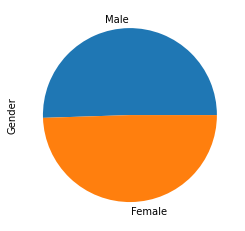

In [179]:
ricos.Gender.value_counts().plot.pie();